In [4]:
data_path = "./data/dataset/train/2b827.png"

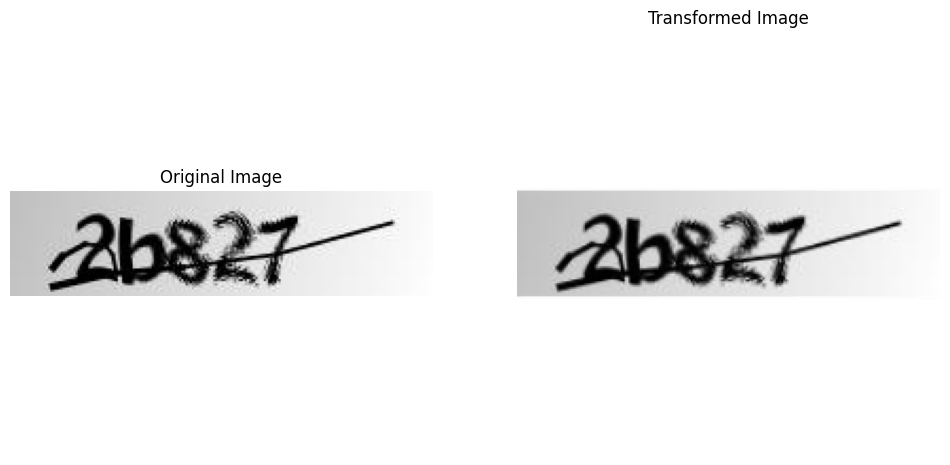

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

# Function to calculate padding
def get_padding(image):
    width, height = image.size
    if width > height:
        padding = (0, (width - height) // 2, 0, (width - height) - (width - height) // 2)
    else:
        padding = ((height - width) // 2, 0, (height - width) - (height - width) // 2, 0)
    return padding

# Custom transform to add padding
class PadToSquare(object):
    def __call__(self, image):
        padding = get_padding(image)
        return transforms.functional.pad(image, padding, fill=0, padding_mode='constant')

# Example transform with padding to square
transform = transforms.Compose([
    PadToSquare(),                     # Add padding to make it square
    transforms.Resize((224, 224)),     # Final resize to the desired input size for the model
    transforms.ToTensor(),             # Convert image to tensor
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize the image
])

# Load an image
image_path = data_path  # Replace with the path to your image
original_image = Image.open(image_path)

# Apply the transformations
transformed_image = transform(original_image)

# Convert the tensor back to a PIL image for visualization
transformed_image_pil = transforms.ToPILImage()(transformed_image)

# Plot the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Transformed image
ax[1].imshow(transformed_image_pil)
ax[1].set_title('Transformed Image')
ax[1].axis('off')

plt.show()
